## Practical 5: DBScan(density based spatia clustering on applications with noise) clustering
## Aim: to apply DBScan clustering in mall customer data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/kafeel/Downloads/Mall_customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [7]:
new_df = pd.get_dummies(df['Genre'],dtype=int)

In [8]:
df= pd.concat([df,new_df],axis=1)

In [9]:
df = df.drop('Genre', axis = 1)

In [10]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [11]:
len(df)

200

In [12]:
df = df.drop('CustomerID',axis=1)

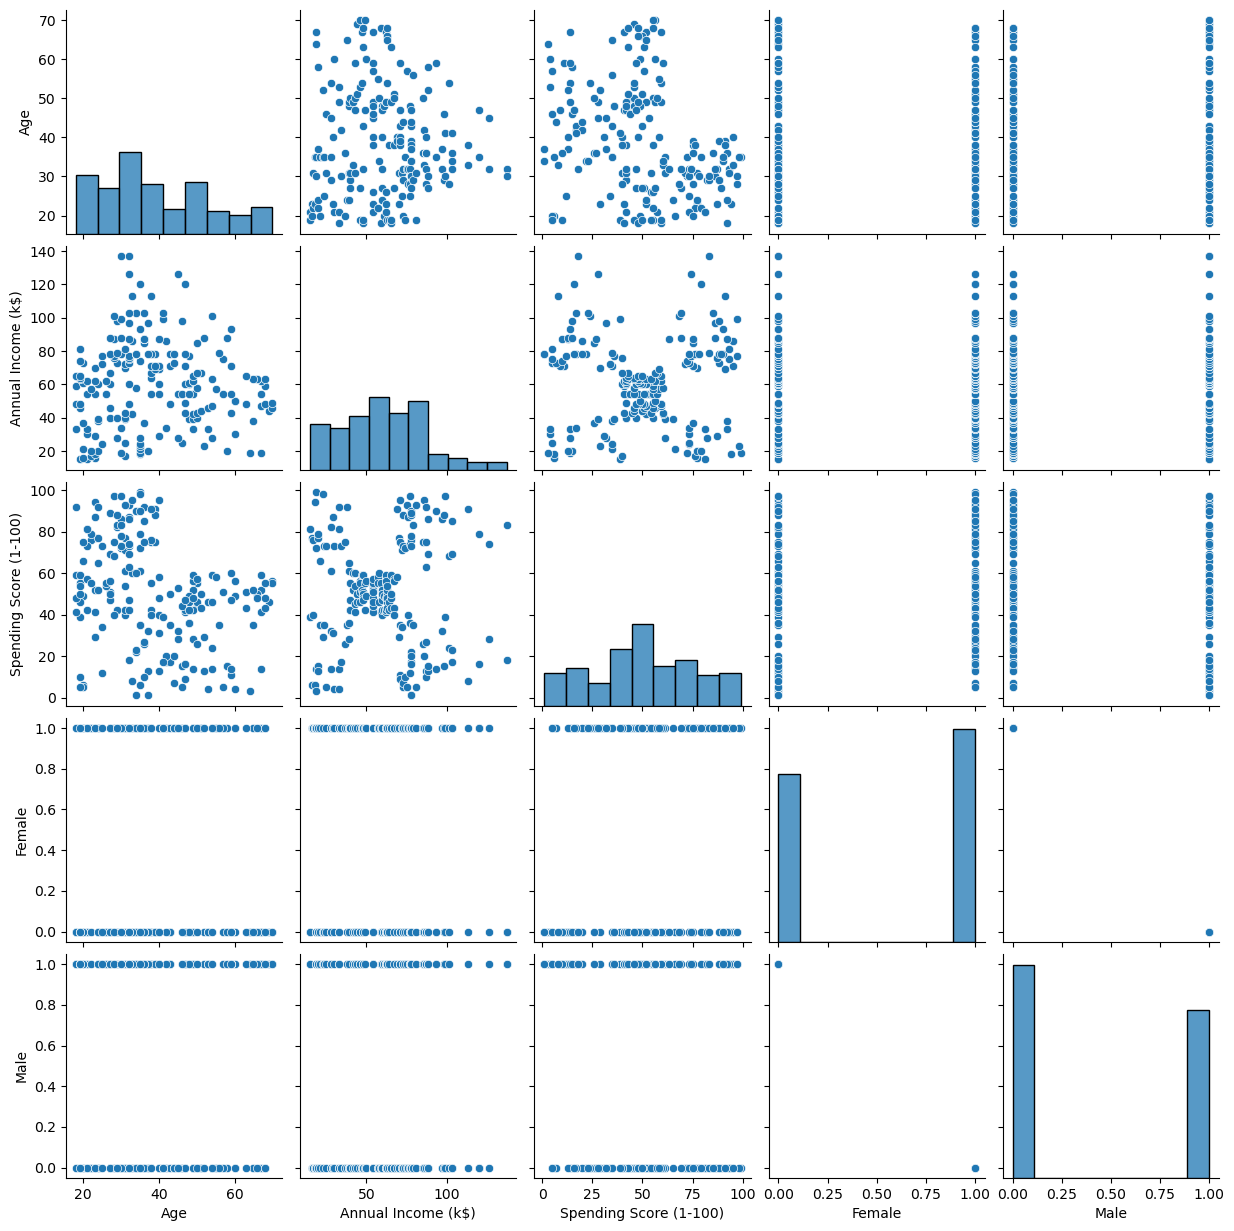

In [13]:
sns.pairplot(df)

<Axes: >

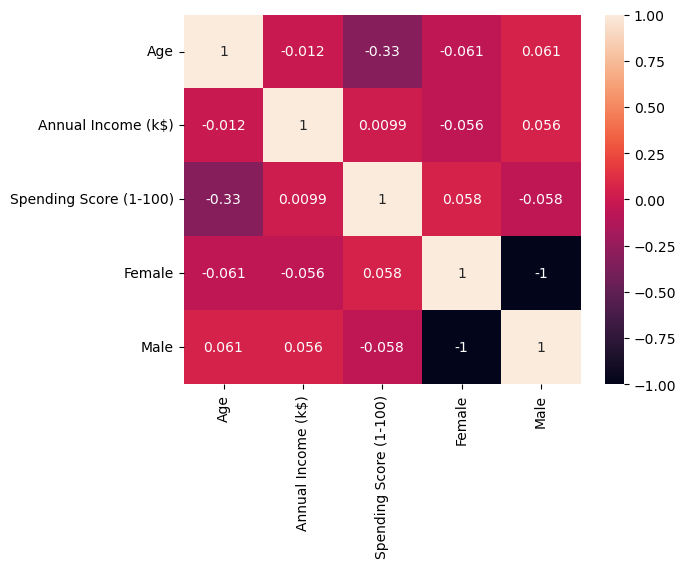

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
male_spending = df.loc[df['Male']==1,'Spending Score (1-100)'].sum()
female_spending = df.loc[df['Female']==1,'Spending Score (1-100)'].sum()
labels = ['Male','Female']
colors=['red','pink']

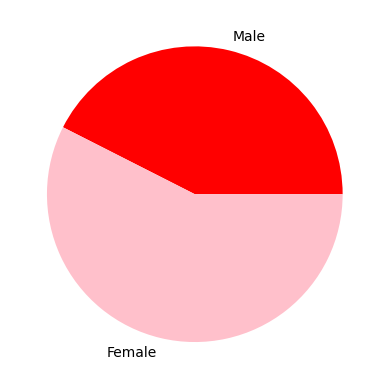

In [16]:
plt.pie([male_spending,female_spending],labels=labels,colors=colors)
plt.show()

In [27]:
age_25 = df[(df['Age']>=25)].sum()
age_40 = df[df['Age']<=40].sum()

In [29]:
sns.countplot(age_25,age_40)

TypeError: countplot() takes from 0 to 1 positional arguments but 2 were given